# Motivation

## Why coding?

![](images/motivation/coding_superpower.jpg)

Coding enables you to...
- automate your processes,
- work efficiently (especially with large data sets),
- do exactly what you want to do!

## Why Python?

![](images/motivation/python_r_development.png)

> Python is an unusual case for being both one of the **most visited** tags on Stack Overflow and one of the **fastest-growing** ones. (Incidentally, it is also accelerating! Its year-over-year growth has become faster each year since 2013). Source: [StackOverflow Blog](https://stackoverflow.blog/2017/09/06/incredible-growth-python/)

Python...
- is beginner friendly,
- flexible,
- readable,
- has a big onliny community,
- is a first-class tool for scientific computing tasks, including the analysis and visualization of large datasets,
- is used in
    - Remote Sensing
    - Machine Learning
    - Big Data
    - Image Processing
    - Data Analysis
    - Data Visualization


- is the 2nd most demanded programming skill (in the US)
- is the 2nd best paid programming skill (> 105'000$ in the US)
- is heavily used at large companies like Google & Facebook but also at NASA, ESA, EUMETSAT, etc.

----------

## Aim of the course

**At the end of this course you will be able to...**

**... work with the basic concepts of Python:**

In [7]:
print("Hallo Welt!")

Hallo Welt!


**... use standard Python tools for data science (numpy, scipy, pandas, matplotlib):**

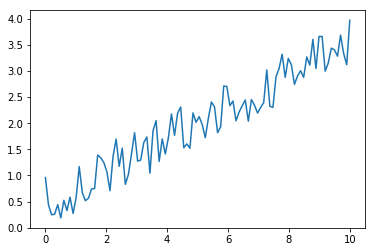

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(np.linspace(0,10,100),np.random.random(100)+np.linspace(0,3,100))
plt.show()

**... visualize your data in map plots:**

![](images/motivation/basemap_example.png)

**... read, manipulate and visualize meteorological satellite data (e.g. Meteosat):**

![](images/motivation/msg_example.png)